<a href="https://colab.research.google.com/github/antmaio/Creactif_Fastai/blob/main/Fastai_Seance4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paramétrer le hardware pour travailler sur GPU

In [2]:
from fastai.vision.all import *

## Rappel structure datablock

In [ ]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),  # définition du TYPE d'entrée / sortie
                 get_items=get_image_files,           # définition du CHARGEMENT des entrées
                 get_y = label_func,                  # définition du CHARGEMENT des sorties
                 splitter=splitter)                   # définition de la SEPARATION des données

In [ ]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),  
                 get_items=get_image_files,           
                 get_y = label_func,                  
                 splitter=splitter,                  
                 item_tfms=Resize(100))               # Changer la résolution les images pour obtenir une taille de 100x100 pour toutes

# Rappel Dataloader

Le Dataloader prend en entrée une liste d'indices ou de paths

In [ ]:
dls = pets.dataloaders(untar_data(URLs.PETS)/"images", bs=4) #Ici, entrée = liste de paths
dls.show_batch()

# Utilisation de données déjà chargées dans l'environnement

In [ ]:
# téléchargement d'une image web (chat)
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/June_odd-eyed-cat_cropped.jpg/1216px-June_odd-eyed-cat_cropped.jpg 
# téléchargement d'une image web (chien)
!wget https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/golden-retriever-royalty-free-image-506756303-1560962726.jpg

# Récupération des paths
import glob
mes_images = glob.glob("./*.jpg")
print("les images s'appellent: ", mes_images)

# On place toutes les images (matrices 3D) dans une liste
from torchvision.io import read_image
im_list = [] # créer une liste vide
for _,item in enumerate(mes_images):
  mon_image = read_image(item)
  im_list.append(mon_image)

# définition des catégories
cat = [1, 0] # la 1ère image est un chat et la 2ème est un chien

# Exercice 1:

Prédéterminer, sans code, la taille de la liste et estimer la shape des éléments à l'intérieur.

Comment vérifier la réponse ?

In [ ]:
# votre code

In [141]:
# On définit un nouveau dataloader
def my_dataloader(liste_entree, cat_sortie):
  def pass_indices(indices):    # par défaut, "dblock.dataloaders" prend une liste d'indices en argument, il faut définir comment les gérer
    return indices

  def get_x(idx):         # comment charger les inputs
    im = liste_entree[idx][:,:512,:512] # on coupe l'image à la taille voulue
    return im

  def get_y(idx):         # comment charger les outputs
    return cat_sortie[idx]

  # on crée le DataBlock (note: pas besoin de splitter parce qu'on a que 2 images donc pas assez pour entrainement/validation)
  dblock = DataBlock( blocks=(TransformBlock, CategoryBlock),
                      get_items=pass_indices,
                      get_x=get_x,
                      get_y=get_y
                      )
  
  nombre_images = len(liste_entree) #la première dimension du tensor d'entrée nous donne le nombre d'éléments à traiter
  dls = dblock.dataloaders(list(range(nombre_images)), bs=2) 

  return dls

# 4) on crée le dataloader
dls = my_dataloader(im_list, cat)
print(dls.one_batch()[0].shape)

torch.Size([2, 3, 512, 512])


In [ ]:
batch1 = dls.one_batch()[0] # prendre l'input d'un batch
print(batch1.shape)
b = batch1[0]               # prendre le 1er élément du batch 
b = b.permute(1,2,0)        # permuter pour satistifaire les dimensions requise par plt.imshow
plt.imshow(b)
plt.show()

# Il y a une erreur car on est sur GPU et imshow requiert une entr&ée sur CPU

In [ ]:
b = b.cpu()
plt.imshow(b)
plt.show()

# Exercice 2

Au lieu de couper l'image, changez sa taille en changeant la résolution grâce à la fonction "resize" de torchvision.transform.functional

ET afficher une image du batch

In [ ]:
from ''' VOTRE CODE ''' import resize

# On définit un nouveau dataloader
def my_dataloader2(liste_entree, cat_sortie):
  def pass_indices(indices):    # par défaut, "dblock.dataloaders" prend une liste d'indices en argument, il faut définir comment les gérer
    return indices

  def get_x(idx):         # comment charger les inputs
    ''' VOTRE CODE '''
    return im

  def get_y(idx):         # comment charger les outputs
    return cat_sortie[idx]

  # on crée le DataBlock (note: pas besoin de splitter parce qu'on a que 2 images donc pas assez pour entrainement/validation)
  dblock = DataBlock( blocks=(TransformBlock, CategoryBlock),
                      get_items=pass_indices,
                      get_x=get_x,
                      get_y=get_y
                      )
  
  nombre_images = len(liste_entree) #la première dimension du tensor d'entrée nous donne le nombre d'éléments à traiter
  dls = dblock.dataloaders(list(range(nombre_images)), bs=2) 

  return dls

# 4) on crée le dataloader
dls = my_dataloader2(im_list, cat)
print(dls.one_batch()[0].shape)

torch.Size([2, 3, 512, 512])


In [ ]:
''' VOTRE CODE ''' # afficher une image du batch

# Normalisation

Pour éviter les biais au sein des matrices d'entrée, on normalise les données

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  """


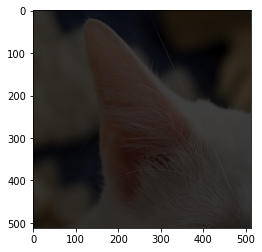

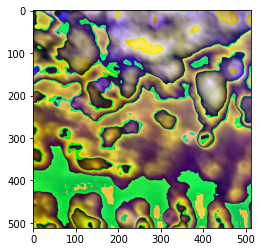

In [142]:
batch0 = dls.one_batch()[0] # prendre l'input d'un batch
item0 = batch0[0]
item1 = batch0[1]

item0 = item0//4
item1 = item1*4

plt.imshow(item0.permute(1,2,0).cpu()) #chien
plt.show()
plt.imshow(item1.permute(1,2,0).cpu()) #chat
plt.show()

Il y a un contraste différent pour l'image de chien par rapport à l'image de chat donc le modèle risque de reconnaître le type de contraste plutôt que le contenu de l'image.

⇒ On doit NORMALISER

Ici, on va utiliser le ***min-max normalization*** pour que chaque image ait des valeurs comprises entre 0 et 1

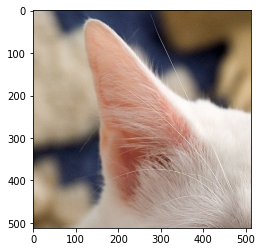

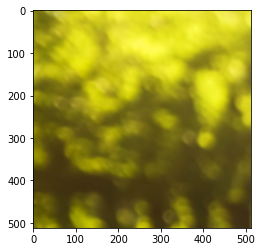

In [145]:
for _,b in enumerate(batch0):
  b_norm = (b-b.min())/(b.max()-b.min())
  plt.imshow(b_norm.permute(1,2,0).cpu())
  plt.show()

# Exercice 3

Créer une fonction qui réalise une min-max normalization sur une image par channel

image_rescaled = min_max_norm(image_entree)

In [91]:
''' VOTRE CODE '''

La normalisation peut être faite:

*   Durant le preprocessing
*   Manuellement au sein du get_x
*   Dans le batch_tfms

Note : l'idéal est de démarrer avec une base de données distribuée entre 0 et 1 pour pouvoir ensuite facilement appliquer une normalisation au sein du batch_tfms


In [30]:
Normalize??
# Normalize.from_stats??

In [ ]:
im_list2 = [] # créer une liste vide
tfms_list = [.25, 4]
for i,item in enumerate(mes_images):
  mon_image = read_image(item)*tfms_list[i]
  mon_image = min_max_norm(mon_image)
  im_list2.append(mon_image)

def my_dataloader(liste_entree, cat_sortie):
  def pass_indices(indices):    # par défaut, "dblock.dataloaders" prend une liste d'indices en argument, il faut définir comment les gérer
    return indices

  def get_x(idx):         # comment charger les inputs
    im = liste_entree[idx][:,:512,:512] # on coupe l'image à la taille voulue
    return im

  def get_y(idx):         # comment charger les outputs
    return cat_sortie[idx]

  # on crée le DataBlock (note: pas besoin de splitter parce qu'on a que 2 images donc pas assez pour entrainement/validation)
  dblock = DataBlock( blocks=(TransformBlock, CategoryBlock),
                      get_items=pass_indices,
                      get_x=get_x,
                      get_y=get_y,
                      batch_tfms=Normalize.from_stats(.5,.5) #Chaque réseau est optimisé pour une certaine distribution de données
                      )
  
  nombre_images = len(liste_entree) #la première dimension du tensor d'entrée nous donne le nombre d'éléments à traiter
  dls = dblock.dataloaders(list(range(nombre_images)), bs=2) 

  return dls

# 4) on crée le dataloader
dls = my_dataloader(im_list2, cat)
print(dls.one_batch()[0].shape)

In [ ]:
batch0 = dls.one_batch()[0] # prendre l'input d'un batch
item0 = batch0[0]
item1 = batch0[1]

print(item1.min())
print(item1.max())

plt.imshow(item0.permute(1,2,0).cpu()) #chien
plt.show()
plt.imshow(item1.permute(1,2,0).cpu()) #chien
plt.show()

# Modèles existants

In [106]:
import fastai.vision.models as m
dir(m)
# m.resnet34()

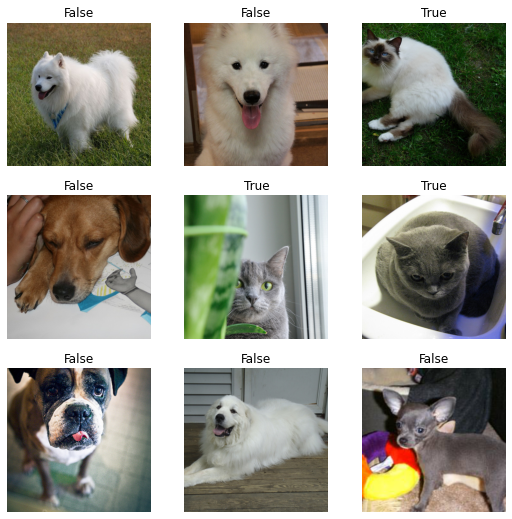

In [123]:
def label_func(f): 
  name = f.name #on veut accéder aux noms uniquement
  return name[0].isupper()

splitter = RandomSplitter(0.2)

pets = DataBlock(blocks=(ImageBlock, CategoryBlock),  
                 get_items=get_image_files,           
                 get_y = label_func,                  
                 splitter=splitter,
                 item_tfms=[Resize(224)],
                 batch_tfms = Normalize.from_stats(*imagenet_stats))

dls = pets.dataloaders(untar_data(URLs.PETS)/"images", bs=32) #Ici, entrée = liste de paths
dls.show_batch()

# Learner

Le learner est un "wrapper" qui aggrège toutes les informations utiles à l'entraînement d'un réseau de neurones.

Les infos à mettre dans le learner sont reprises dans la doc :

In [131]:
Learner??
#Permet d'afficher la doc sur Colab

In [ ]:
mon_dataloader = dls
mon_model = resnet34()
ma_metrique = accuracy

mon_learner = Learner(dls=mon_dataloader, model=mon_model, metrics=ma_metrique)

Une fois le Learner défini, on peut lancer l'entraînement grâce à la fonction "fit"

In [130]:
Learner.fit??

In [ ]:
mon_learner.fit(1)

On peut utiliser le réseau pré-entraîné

In [ ]:
mon_dataloader = dls
mon_model = resnet34(pretrained=True)
ma_metrique = accuracy

mon_learner = Learner(dls=mon_dataloader, model=mon_model, metrics=ma_metrique)

In [ ]:
# Quelle version est la plus "efficace" (en terme d'écriture de code)
mon_learner = Learner(dls=mon_dataloader, model=mon_model, metrics=ma_metrique)
mon_learner = Learner(mon_dataloader, mon_model, ma_metrique)
mon_learner = Learner(mon_dataloader, mon_model, metrics=ma_metrique)

# Exercice 4

Réaliser l'entraînement du réseau Resnet50 (pré-entraîné) sur les images PETS (les 2000 dernières images utilisées pour la validation) avec différents batch sizes sur 1 epoch. Quelle est l'influence du batch size ?

In [ ]:
''' VOTRE CODE '''

# Exercice Extra (chez vous)

Réaliser un entraînement du réseau GoogleNet avec les images de PETS (8,3,H,W) en bouclant 3 fois sur l'ensemble de la database

Tips: from fastai.vision.models import tvm